In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read and check the data
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data contains; 
 1.  age - age in years 
 2.  sex - (1 = male; 0 = female) 
 3.  cp - chest pain type(Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4:       asymptomatic)
 4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
 5.  chol - serum cholestoral in mg/dl 
 6.  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
 7.  restecg - resting electrocardiographic results 
 8.  thalach - maximum heart rate achieved 
 9.  exang - exercise induced angina (1 = yes; 0 = no) 
 10. oldpeak - ST depression induced by exercise relative to rest 
 11. slope - the slope of the peak exercise ST segment(Value 1: upsloping, Value 2: flat, Value 3: downsloping) 
 12. ca - number of major vessels (0-3) colored by flourosopy 
 13. thal -A blood disorder called thalassemia(3=normal; 6 = fixed defect; 7 = reversable defect)
 14. target - have disease or not (1=yes, 0=no)

In [4]:
print('Number of rows and columns :',df.shape)
df.describe()

Number of rows and columns : (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Heatmap for the Dataset')

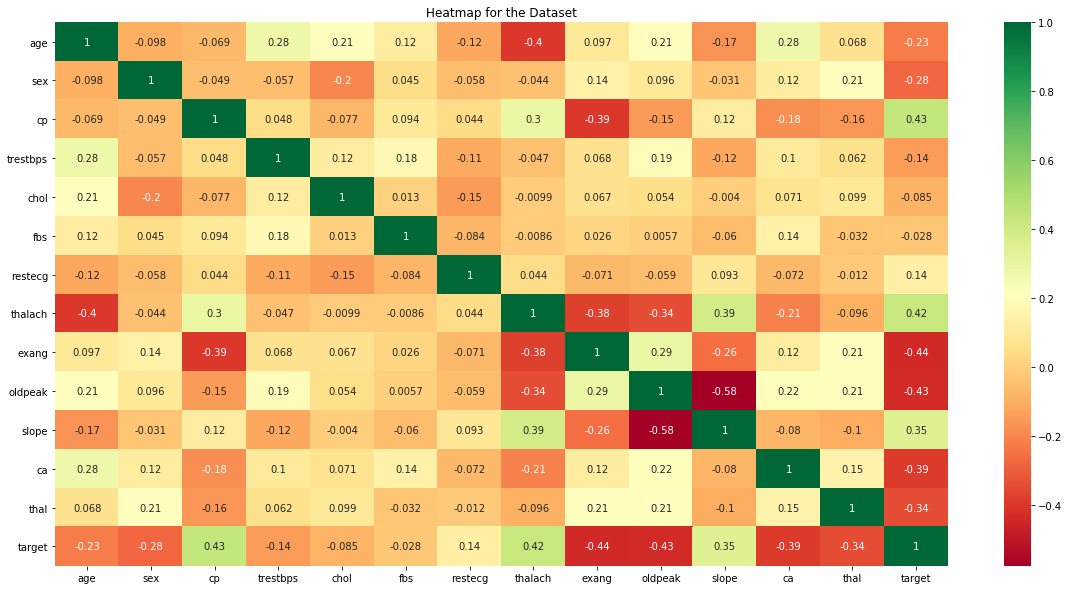

In [7]:
#Feature correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,cmap="RdYlGn")
plt.title('Heatmap for the Dataset')

In [8]:
#calculate how many are having heart disease and not heart having disease
target_value = df.target.value_counts()
print('Number of patients have heart disease:{}'.format(target_value[1]))
print("Number of patients haven't heart disease:{}".format(target_value[0]))

Number of patients have heart disease:165
Number of patients haven't heart disease:138


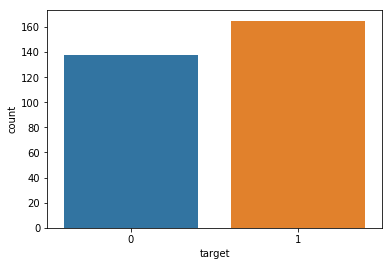

In [9]:
sns.countplot(x='target',data=df)

In the target class 0 shows that the people is not suffering from disease and 1 shows that the  people is suffering from disease.

Text(0.5, 0, 'Age')

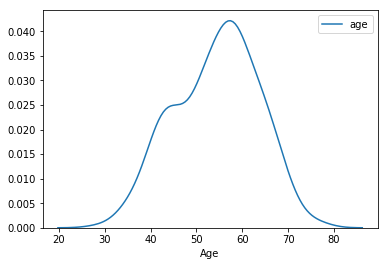

In [10]:
#checking the age of patients
sns.kdeplot(df.age)
plt.xlabel('Age')

The above graph shows that the highest number of people suffering from heart disease are in the age group(55-65).The patients in age group(20-30) are very less likely suffer from heart disease 

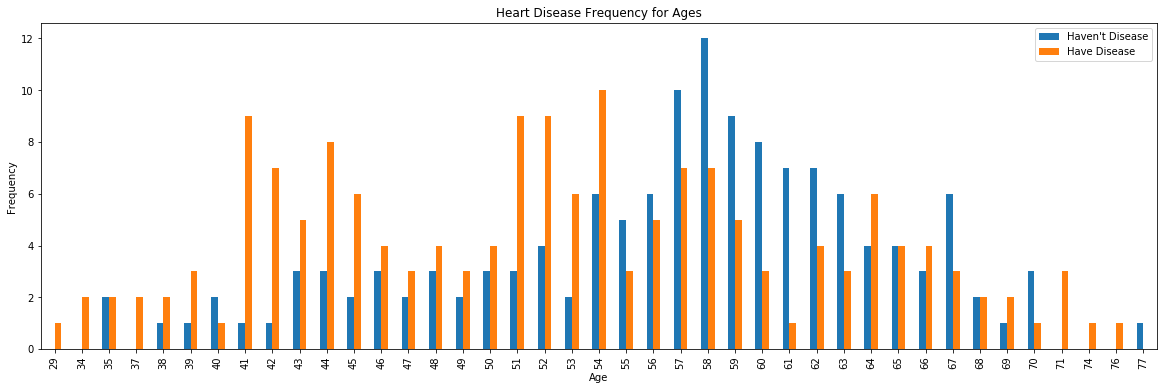

In [11]:
#Age vs target
df.groupby(df['age']).target.value_counts().unstack().plot(kind = 'bar',figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease",'Have Disease'])

([<matplotlib.axis.XTick at 0x7f624437b550>,
 <a list of 2 Text xticklabel objects>)

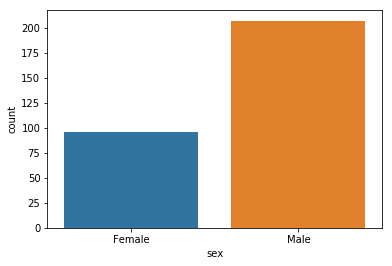

In [12]:
LABELS=['Female','Male']
sns.countplot(x = 'sex',data=df)
plt.xticks(range(2), LABELS)

In the above bar graph, we can assume that the number of male patients are two times more then females patients.

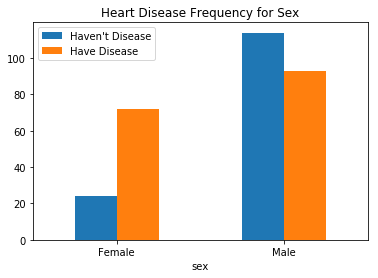

In [13]:
LABELS=['Female','Male']
df.groupby(df['sex']).target.value_counts().unstack().plot(kind = 'bar')
plt.title('Heart Disease Frequency for Sex')
plt.xticks(range(2), LABELS,rotation=360)
plt.legend(["Haven't Disease",'Have Disease'])

Text(0, 0.5, 'Frequency')

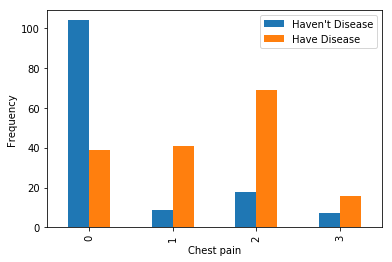

In [14]:
df.groupby(df['cp']).target.value_counts().unstack().plot(kind = 'bar')
plt.legend(["Haven't Disease",'Have Disease'])
plt.xlabel('Chest pain')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Relation between trestbps and target')

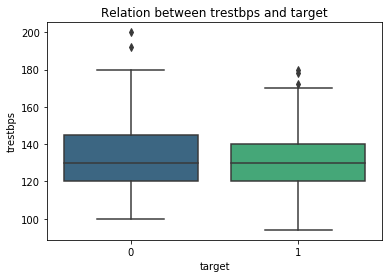

In [15]:
sns.boxplot(df['target'],df['trestbps'],palette = 'viridis')
plt.title('Relation between trestbps and target')

The relation between trestbps and target plot clearly says that the patients who are not suffer from the disease have slightly greater blood pressure then the patients who have heart disease.

Text(0.5, 1.0, 'Relation between Cholestrol and Target')

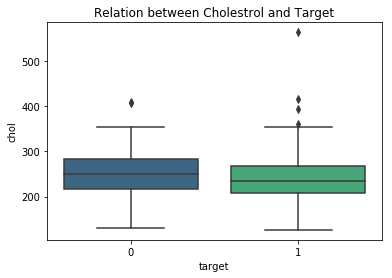

In [16]:
sns.boxplot(df['target'],df['chol'],palette = 'viridis')
plt.title('Relation between Cholestrol and Target')

Above the bivariate graph says that the patients who suffer from heart disease are having higher cholestol level then the patients who have not heart disease.

Text(0.5, 1.0, 'Relation between ECG and Target')

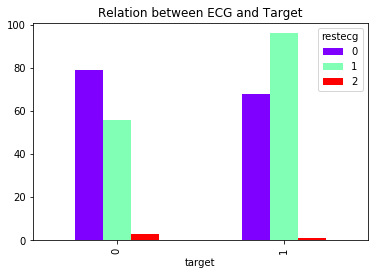

In [17]:
df.groupby(df['target']).restecg.value_counts().unstack().plot(kind = 'bar',color = plt.cm.rainbow(np.linspace(0, 1, 3)))
plt.title('Relation between ECG and Target')

Text(0.5, 1.0, 'Relation between Slope and Target')

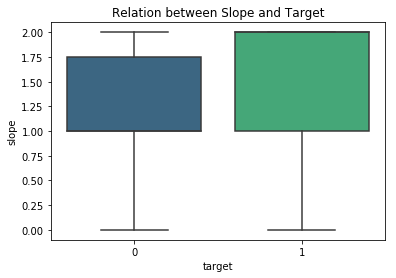

In [18]:
sns.boxplot(df['target'],df['slope'],palette = 'viridis')
plt.title('Relation between Slope and Target')

This plot clearly shows that the patients who are suffer from any heart diseases are mostly having value 1 and value 2 are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

Text(0.5, 1.0, 'Relation between number of major vessels and target')

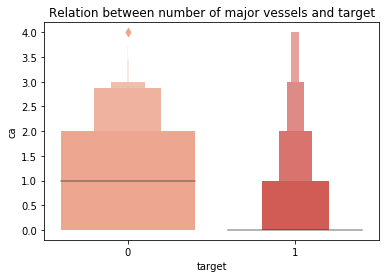

In [19]:
sns.boxenplot(df['target'], df['ca'], palette = 'Reds')
plt.title('Relation between number of major vessels and target')

The major vessel is helpful in determining the heart disease,more number of vessel,the more chances of suffering from heart disease.

Text(0.5, 1.0, 'Relation between heart rate and target')

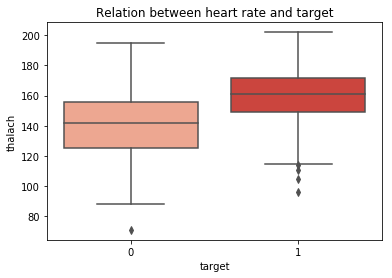

In [20]:
sns.boxplot(df['target'], df['thalach'], palette = 'Reds')
plt.title('Relation between heart rate and target')

This plot clearly shows that the person who have suffer from heart disease are having maximum heart rate then the person who haven't.So it is very important to keep our heart rate low.

In [21]:
# let's change the names of the  columns for better understanding

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [22]:
df['sex']=df['sex'].map({0:'female',1:'male'})
df['chest_pain_type']=df['chest_pain_type'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df['fasting_blood_sugar']=df['fasting_blood_sugar'].map({0:'lower than 120mg/ml',1:'greater than 120mg/ml'})
df['rest_ecg']=df['rest_ecg'].map({0:'normal',1:'ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['exercise_induced_angina']=df['exercise_induced_angina'].map({0:'no',1:'yes'})
df['st_slope']=df['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
df['thalassemia']=df['thalassemia'].map({0:'0',1:'normal',2:'fixed defect',3:'reversable defect'})

In [23]:
x = df.drop('target',axis=1)
y= df['target']

In [24]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [25]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [26]:
x = pd.get_dummies(x,drop_first=True)

In [27]:
x.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,0,0,1,0,0


In [28]:
x.shape

(303, 19)

In [29]:
# splitting the sets into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



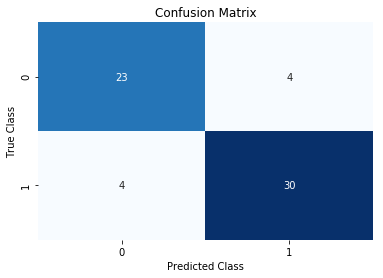

In [30]:
#Modelling
#Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,  cmap = 'Blues',cbar=None)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


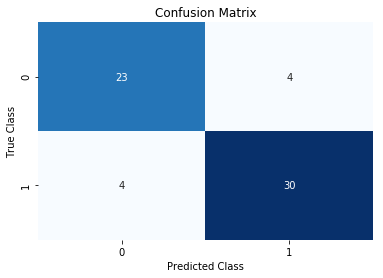

In [31]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr= lr.predict(x_test)
cm_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm_lr, annot = True,  cmap = 'Blues',cbar=None)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# classification report
cr_lr = classification_report(y_test, pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



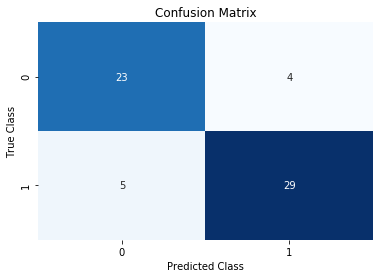

In [32]:
#Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
pred_nb = nb.predict(x_test)
cm_nb = confusion_matrix(y_test, pred_nb)
sns.heatmap(cm_nb, annot = True,  cmap = 'Blues',cbar=None)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# classification report
cr_nb = classification_report(y_test, pred_nb)
print(cr_nb)


([<matplotlib.axis.XTick at 0x7f6239743438>,
 <a list of 19 Text xticklabel objects>)

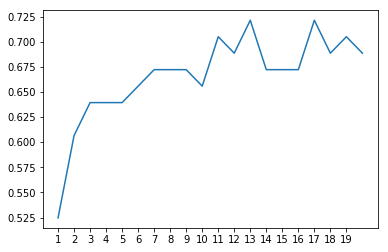

In [33]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_score = []
for i in range(1,21):
    dt= KNeighborsClassifier(n_neighbors=i)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    knn_score.append(accuracy_score(y_test,pred))
plt.plot(range(1,21),knn_score)
plt.xticks(np.arange(1,20,1))    

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.77      0.71      0.74        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



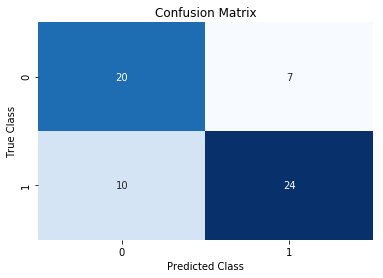

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
cm_knn = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm_knn, annot = True,  cmap = 'Blues',cbar=None)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# classification report
cr_knn = classification_report(y_test, pred_knn)
print(cr_knn)